In [1]:
batch_n = 100
in_features = 3
out_features = 1
epochs = 100
learning_rate = 0.001

In [2]:
import torch

In [5]:
# y= 3x_1+5x_2+1x_3

x = torch.randn(batch_n, in_features)
c = torch.Tensor([[3.],[5.], [1.]])
y = x.mm(c)
y = y.add(torch.rand(batch_n, out_features))

y

tensor([[  1.7125],
        [ -2.1087],
        [ -6.9102],
        [  5.5170],
        [ -0.0660],
        [ -6.0900],
        [ -4.0162],
        [ -8.2353],
        [ -4.0762],
        [  2.2560],
        [ 21.2188],
        [ -4.4062],
        [ -6.5099],
        [  0.6345],
        [-11.6526],
        [ -1.0357],
        [ -5.1031],
        [ -2.9149],
        [ 11.8758],
        [ -4.8776],
        [  3.4154],
        [  1.6701],
        [ -0.4781],
        [ -7.4427],
        [ -3.4463],
        [  5.6863],
        [ -2.3867],
        [ -7.3104],
        [  4.1616],
        [  1.0508],
        [ -4.4186],
        [  5.3374],
        [  7.0370],
        [  2.4407],
        [ -0.9477],
        [ -0.9900],
        [ -4.0372],
        [  8.4705],
        [  6.9708],
        [  0.5473],
        [ -4.7396],
        [  1.7500],
        [  8.8795],
        [ -7.9241],
        [  8.7542],
        [-10.5662],
        [ 11.7420],
        [  0.2106],
        [  2.2663],
        [ -0.2779],


In [6]:
import matplotlib.pyplot as plt

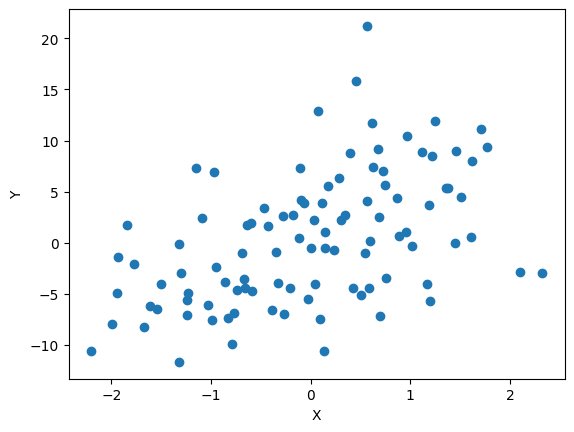

In [10]:
plt.figure()
plt.scatter(x[:,0],y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


In [12]:
w = torch.rand(in_features, out_features)
w

tensor([[0.2737],
        [0.7073],
        [0.7595]])

In [17]:
for epoch in range(epochs):
  y_pred = x.mm(w)
  loss = (y_pred-y).pow(2).sum()
  print("epoch:{}, Loss:{:.4f}".format(epoch, loss))

  grad_y_pred = 2*(y_pred-y)
  grad_w = x.t().mm(grad_y_pred)
  w -= learning_rate*grad_w



epoch:0, Loss:2958.9980
epoch:1, Loss:1767.7474
epoch:2, Loss:1065.0219
epoch:3, Loss:649.2582
epoch:4, Loss:402.4675
epoch:5, Loss:255.4400
epoch:6, Loss:167.4880
epoch:7, Loss:114.6329
epoch:8, Loss:82.7054
epoch:9, Loss:63.3077
epoch:10, Loss:51.4462
epoch:11, Loss:44.1410
epoch:12, Loss:39.6062
epoch:13, Loss:36.7667
epoch:14, Loss:34.9720
epoch:15, Loss:33.8264
epoch:16, Loss:33.0875
epoch:17, Loss:32.6056
epoch:18, Loss:32.2880
epoch:19, Loss:32.0763
epoch:20, Loss:31.9337
epoch:21, Loss:31.8366
epoch:22, Loss:31.7699
epoch:23, Loss:31.7237
epoch:24, Loss:31.6914
epoch:25, Loss:31.6686
epoch:26, Loss:31.6525
epoch:27, Loss:31.6410
epoch:28, Loss:31.6327
epoch:29, Loss:31.6268
epoch:30, Loss:31.6225
epoch:31, Loss:31.6194
epoch:32, Loss:31.6172
epoch:33, Loss:31.6155
epoch:34, Loss:31.6143
epoch:35, Loss:31.6135
epoch:36, Loss:31.6128
epoch:37, Loss:31.6124
epoch:38, Loss:31.6120
epoch:39, Loss:31.6118
epoch:40, Loss:31.6116
epoch:41, Loss:31.6114
epoch:42, Loss:31.6114
epoch:43, 

In [18]:
w

tensor([[3.0098],
        [4.9782],
        [0.9350]])

In [19]:
from torch.autograd import Variable

In [30]:
Vx = Variable(x, requires_grad=False)
Vy = Variable(y, requires_grad=False)
Vw = Variable(torch.rand(in_features, out_features), requires_grad=True)


In [31]:
for epoch in range(epochs):
  y_pred = Vx.mm(Vw)
  loss = (y_pred-Vy).pow(2).sum()
  print("epoch:{}, Loss:{:.4f}".format(epoch, loss))

  loss.backward()

  Vw.data -= learning_rate * Vw.grad.data
  Vw.grad.data.zero_()


epoch:0, Loss:3917.1523
epoch:1, Loss:2309.4905
epoch:2, Loss:1370.1782
epoch:3, Loss:820.2678
epoch:4, Loss:497.6260
epoch:5, Loss:307.8729
epoch:6, Loss:195.9797
epoch:7, Loss:129.8055
epoch:8, Loss:90.5421
epoch:9, Loss:67.1609
epoch:10, Loss:53.1806
epoch:11, Loss:44.7832
epoch:12, Loss:39.7131
epoch:13, Loss:36.6344
epoch:14, Loss:34.7528
epoch:15, Loss:33.5946
epoch:16, Loss:32.8760
epoch:17, Loss:32.4263
epoch:18, Loss:32.1422
epoch:19, Loss:31.9610
epoch:20, Loss:31.8442
epoch:21, Loss:31.7680
epoch:22, Loss:31.7179
epoch:23, Loss:31.6844
epoch:24, Loss:31.6619
epoch:25, Loss:31.6466
epoch:26, Loss:31.6361
epoch:27, Loss:31.6288
epoch:28, Loss:31.6237
epoch:29, Loss:31.6201
epoch:30, Loss:31.6176
epoch:31, Loss:31.6158
epoch:32, Loss:31.6145
epoch:33, Loss:31.6135
epoch:34, Loss:31.6129
epoch:35, Loss:31.6124
epoch:36, Loss:31.6120
epoch:37, Loss:31.6118
epoch:38, Loss:31.6116
epoch:39, Loss:31.6114
epoch:40, Loss:31.6113
epoch:41, Loss:31.6113
epoch:42, Loss:31.6112
epoch:43, 

In [32]:
Vw

tensor([[3.0098],
        [4.9782],
        [0.9350]], requires_grad=True)

In [34]:
import torch.nn as nn

In [67]:
class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    self.linear = nn.Linear(in_features, out_features)

  def forward(self, x):
    y_pred = self.linear(x)
    return y_pred

  def backward(self):
    pass

In [68]:
model = Model()
Vw = Variable(torch.rand(in_features, out_features), requires_grad=True)

In [62]:
for epoch in range(epochs):
  y_pred = model(Vx, Vw)
  loss = (y_pred-Vy).pow(2).sum()
  print("epoch:{}, Loss:{:.4f}".format(epoch, loss))

  loss.backward()

  Vw.data -= learning_rate * Vw.grad.data
  Vw.grad.data.zero_()


TypeError: Model.forward() takes 2 positional arguments but 3 were given

In [64]:
Vw

tensor([[0.9725],
        [0.1772],
        [0.8785]], requires_grad=True)

In [73]:
model = Model()
loss_fn = nn.MSELoss()
print(model)

Model(
  (linear): Linear(in_features=3, out_features=1, bias=True)
)


In [78]:
for epoch in range(epochs*100):
  y_pred = model(x)
  loss = loss_fn(y_pred, y)
  if (epoch%100 == 0):
    print("epoch:{}, Loss:{:.4f}".format(epoch, loss))

  model.zero_grad()
  loss.backward()

  for param in model.parameters():
    param.data -= learning_rate * param.grad.data

epoch:0, Loss:36.5732
epoch:100, Loss:22.8673
epoch:200, Loss:14.3282
epoch:300, Loss:9.0017
epoch:400, Loss:5.6752
epoch:500, Loss:3.5948
epoch:600, Loss:2.2920
epoch:700, Loss:1.4748
epoch:800, Loss:0.9615
epoch:900, Loss:0.6384
epoch:1000, Loss:0.4347
epoch:1100, Loss:0.3060
epoch:1200, Loss:0.2245
epoch:1300, Loss:0.1728
epoch:1400, Loss:0.1398
epoch:1500, Loss:0.1188
epoch:1600, Loss:0.1053
epoch:1700, Loss:0.0966
epoch:1800, Loss:0.0910
epoch:1900, Loss:0.0874
epoch:2000, Loss:0.0850
epoch:2100, Loss:0.0835
epoch:2200, Loss:0.0824
epoch:2300, Loss:0.0817
epoch:2400, Loss:0.0813
epoch:2500, Loss:0.0810
epoch:2600, Loss:0.0807
epoch:2700, Loss:0.0806
epoch:2800, Loss:0.0805
epoch:2900, Loss:0.0804
epoch:3000, Loss:0.0804
epoch:3100, Loss:0.0803
epoch:3200, Loss:0.0803
epoch:3300, Loss:0.0803
epoch:3400, Loss:0.0803
epoch:3500, Loss:0.0803
epoch:3600, Loss:0.0803
epoch:3700, Loss:0.0803
epoch:3800, Loss:0.0803
epoch:3900, Loss:0.0803
epoch:4000, Loss:0.0803
epoch:4100, Loss:0.0802
e

In [79]:
for param in model.parameters():
  print(param)

Parameter containing:
tensor([[3.0171, 4.9546, 1.0288]], requires_grad=True)
Parameter containing:
tensor([0.4927], requires_grad=True)


In [80]:
model = Model()

In [81]:
for param in model.parameters():
  print(param)

Parameter containing:
tensor([[ 0.1599, -0.1314,  0.5663]], requires_grad=True)
Parameter containing:
tensor([-0.4494], requires_grad=True)


In [82]:
import torch.optim as opt

In [83]:
optimizer = opt.SGD(model.parameters(), lr=learning_rate)

In [84]:
for epoch in range(epochs*100):
  y_pred = model(x)
  loss = loss_fn(y_pred, y)
  if (epoch%100 == 0):
    print("epoch:{}, Loss:{:.4f}".format(epoch, loss))

  model.zero_grad()
  loss.backward()
  optimizer.step()

epoch:0, Loss:40.3996
epoch:100, Loss:25.4693
epoch:200, Loss:16.0919
epoch:300, Loss:10.1943
epoch:400, Loss:6.4799
epoch:500, Loss:4.1370
epoch:600, Loss:2.6569
epoch:700, Loss:1.7203
epoch:800, Loss:1.1265
epoch:900, Loss:0.7494
epoch:1000, Loss:0.5094
epoch:1100, Loss:0.3563
epoch:1200, Loss:0.2585
epoch:1300, Loss:0.1957
epoch:1400, Loss:0.1554
epoch:1500, Loss:0.1293
epoch:1600, Loss:0.1125
epoch:1700, Loss:0.1016
epoch:1800, Loss:0.0944
epoch:1900, Loss:0.0897
epoch:2000, Loss:0.0866
epoch:2100, Loss:0.0846
epoch:2200, Loss:0.0832
epoch:2300, Loss:0.0823
epoch:2400, Loss:0.0817
epoch:2500, Loss:0.0812
epoch:2600, Loss:0.0809
epoch:2700, Loss:0.0807
epoch:2800, Loss:0.0806
epoch:2900, Loss:0.0805
epoch:3000, Loss:0.0804
epoch:3100, Loss:0.0804
epoch:3200, Loss:0.0803
epoch:3300, Loss:0.0803
epoch:3400, Loss:0.0803
epoch:3500, Loss:0.0803
epoch:3600, Loss:0.0803
epoch:3700, Loss:0.0803
epoch:3800, Loss:0.0803
epoch:3900, Loss:0.0803
epoch:4000, Loss:0.0803
epoch:4100, Loss:0.0803


In [85]:
for param in model.parameters():
  print(param)

Parameter containing:
tensor([[3.0172, 4.9546, 1.0288]], requires_grad=True)
Parameter containing:
tensor([0.4927], requires_grad=True)


In [86]:
import numpy as np

In [90]:
npy = y.numpy()
bins = np.array([npy.mean()])
inds = np.digitize(npy, bins)
cy = torch.from_numpy(inds)
cy = cy.float()
cy

tensor([[1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
      

In [135]:
Vx = Variable(x, requires_grad=False)
Vy = Variable(cy, requires_grad=False)
Vw = Variable(torch.rand(in_features, out_features), requires_grad=True)

In [93]:
for epoch in range(epochs*1000):
  y_pred = torch.sigmoid(Vx.mm(Vw))
  loss = (-1.0*(Vy*torch.log(y_pred)+(1-Vy)*torch.log(1-y_pred))).mean()
  if (epoch%1000 == 0):
    print("epoch:{}, Loss:{:.4f}".format(epoch, loss))

  model.zero_grad()
  loss.backward()
  optimizer.step()

epoch:0, Loss:0.4275
epoch:1000, Loss:0.4275
epoch:2000, Loss:0.4275
epoch:3000, Loss:0.4275
epoch:4000, Loss:0.4275
epoch:5000, Loss:0.4275
epoch:6000, Loss:0.4275
epoch:7000, Loss:0.4275
epoch:8000, Loss:0.4275
epoch:9000, Loss:0.4275
epoch:10000, Loss:0.4275
epoch:11000, Loss:0.4275
epoch:12000, Loss:0.4275
epoch:13000, Loss:0.4275
epoch:14000, Loss:0.4275
epoch:15000, Loss:0.4275
epoch:16000, Loss:0.4275
epoch:17000, Loss:0.4275
epoch:18000, Loss:0.4275
epoch:19000, Loss:0.4275
epoch:20000, Loss:0.4275
epoch:21000, Loss:0.4275
epoch:22000, Loss:0.4275
epoch:23000, Loss:0.4275
epoch:24000, Loss:0.4275
epoch:25000, Loss:0.4275
epoch:26000, Loss:0.4275
epoch:27000, Loss:0.4275
epoch:28000, Loss:0.4275
epoch:29000, Loss:0.4275
epoch:30000, Loss:0.4275
epoch:31000, Loss:0.4275
epoch:32000, Loss:0.4275
epoch:33000, Loss:0.4275
epoch:34000, Loss:0.4275
epoch:35000, Loss:0.4275
epoch:36000, Loss:0.4275
epoch:37000, Loss:0.4275
epoch:38000, Loss:0.4275
epoch:39000, Loss:0.4275
epoch:40000, 

In [95]:
Vw

tensor([[0.5052],
        [0.6078],
        [0.9845]], requires_grad=True)

In [117]:
class LoigisticRegression(nn.Module):
  def __init__(self):
    super(LoigisticRegression, self).__init__()

  def forward(self, x, w):
    y_pred = torch.sigmoid(x.mm(w))
    return y_pred


In [118]:
model = LoigisticRegression()
Vw = torch.rand(in_features, out_features, requires_grad=True)

In [142]:
for epoch in range(epochs*1000):
  y_pred = torch.sigmoid(Vx.mm(Vw))
  loss = (-1.0*(
      Vy*torch.log10(y_pred)
      +(1.0-Vy)*torch.log10(1.0-y_pred))
  ).mean()
  if (epoch%1000 == 0):
    print("epoch:{}, Loss:{:.4f}".format(epoch, loss))

  loss.backward()
  Vw.data -= learning_rate * Vw.grad.data
  Vw.grad.data.zero_()

epoch:0, Loss:0.1328
epoch:1000, Loss:0.1288
epoch:2000, Loss:0.1252
epoch:3000, Loss:0.1219
epoch:4000, Loss:0.1189
epoch:5000, Loss:0.1161
epoch:6000, Loss:0.1135
epoch:7000, Loss:0.1112
epoch:8000, Loss:0.1090
epoch:9000, Loss:0.1069
epoch:10000, Loss:0.1050
epoch:11000, Loss:0.1032
epoch:12000, Loss:0.1015
epoch:13000, Loss:0.0999
epoch:14000, Loss:0.0984
epoch:15000, Loss:0.0970
epoch:16000, Loss:0.0956
epoch:17000, Loss:0.0943
epoch:18000, Loss:0.0931
epoch:19000, Loss:0.0919
epoch:20000, Loss:0.0908
epoch:21000, Loss:0.0897
epoch:22000, Loss:0.0887
epoch:23000, Loss:0.0877
epoch:24000, Loss:0.0868
epoch:25000, Loss:0.0859
epoch:26000, Loss:0.0850
epoch:27000, Loss:0.0842
epoch:28000, Loss:0.0834
epoch:29000, Loss:0.0826
epoch:30000, Loss:0.0818
epoch:31000, Loss:0.0811
epoch:32000, Loss:0.0804
epoch:33000, Loss:0.0797
epoch:34000, Loss:0.0791
epoch:35000, Loss:0.0784
epoch:36000, Loss:0.0778
epoch:37000, Loss:0.0772
epoch:38000, Loss:0.0766
epoch:39000, Loss:0.0761
epoch:40000, 

In [143]:
Vw

tensor([[1.9461],
        [3.3089],
        [0.7466]], requires_grad=True)

In [181]:
class LoigisticRegression2(nn.Module):
  def __init__(self):
    super(LoigisticRegression2, self).__init__()
    self.linear = nn.Linear(in_features, out_features, False)

  def forward(self, x):
    y_pred = torch.sigmoid(self.linear(x))
    return y_pred

In [157]:
model2 = LoigisticRegression2()
loss_fn = nn.BCELoss()
print(model2)

LoigisticRegression2(
  (linear): Linear(in_features=3, out_features=1, bias=False)
)


In [151]:

for epoch in range(epochs*1000):
  y_pred = model2(Vx)
  loss = loss_fn(y_pred, Vy)
  if (epoch%1000 == 0):
    print("epoch:{}, Loss:{:.4f}".format(epoch, loss))

  model2.zero_grad()
  loss.backward()

  for param in model2.parameters():
    param.data -= learning_rate * param.grad.data

epoch:0, Loss:0.6180
epoch:1000, Loss:0.4958
epoch:2000, Loss:0.4215
epoch:3000, Loss:0.3722
epoch:4000, Loss:0.3370
epoch:5000, Loss:0.3106
epoch:6000, Loss:0.2900
epoch:7000, Loss:0.2733
epoch:8000, Loss:0.2595
epoch:9000, Loss:0.2479
epoch:10000, Loss:0.2379
epoch:11000, Loss:0.2292
epoch:12000, Loss:0.2216
epoch:13000, Loss:0.2148
epoch:14000, Loss:0.2087
epoch:15000, Loss:0.2032
epoch:16000, Loss:0.1983
epoch:17000, Loss:0.1937
epoch:18000, Loss:0.1895
epoch:19000, Loss:0.1857
epoch:20000, Loss:0.1821
epoch:21000, Loss:0.1788
epoch:22000, Loss:0.1757
epoch:23000, Loss:0.1728
epoch:24000, Loss:0.1701
epoch:25000, Loss:0.1675
epoch:26000, Loss:0.1651
epoch:27000, Loss:0.1628
epoch:28000, Loss:0.1606
epoch:29000, Loss:0.1586
epoch:30000, Loss:0.1566
epoch:31000, Loss:0.1548
epoch:32000, Loss:0.1530
epoch:33000, Loss:0.1513
epoch:34000, Loss:0.1497
epoch:35000, Loss:0.1481
epoch:36000, Loss:0.1466
epoch:37000, Loss:0.1452
epoch:38000, Loss:0.1438
epoch:39000, Loss:0.1425
epoch:40000, 

In [158]:
for param in model2.parameters():
    print(param)

Parameter containing:
tensor([[-0.3375,  0.3642,  0.3359]], requires_grad=True)


In [182]:
model3 = LoigisticRegression2()
optimizer3 = opt.SGD(model3.parameters(), lr=learning_rate)

print(model3)

LoigisticRegression2(
  (linear): Linear(in_features=3, out_features=1, bias=False)
)


In [183]:
for epoch in range(epochs*1000):
  y_pred = model3(Vx)
  loss = loss_fn(y_pred, Vy)
  if (epoch%1000 == 0):
    print("epoch:{}, Loss:{:.4f}".format(epoch, loss))

  model3.zero_grad()
  loss.backward()
  optimizer3.step()

epoch:0, Loss:0.9099
epoch:1000, Loss:0.6681
epoch:2000, Loss:0.5291
epoch:3000, Loss:0.4448
epoch:4000, Loss:0.3893
epoch:5000, Loss:0.3502
epoch:6000, Loss:0.3212
epoch:7000, Loss:0.2986
epoch:8000, Loss:0.2806
epoch:9000, Loss:0.2657
epoch:10000, Loss:0.2533
epoch:11000, Loss:0.2426
epoch:12000, Loss:0.2334
epoch:13000, Loss:0.2253
epoch:14000, Loss:0.2182
epoch:15000, Loss:0.2118
epoch:16000, Loss:0.2060
epoch:17000, Loss:0.2008
epoch:18000, Loss:0.1961
epoch:19000, Loss:0.1917
epoch:20000, Loss:0.1877
epoch:21000, Loss:0.1840
epoch:22000, Loss:0.1806
epoch:23000, Loss:0.1773
epoch:24000, Loss:0.1743
epoch:25000, Loss:0.1715
epoch:26000, Loss:0.1689
epoch:27000, Loss:0.1664
epoch:28000, Loss:0.1640
epoch:29000, Loss:0.1618
epoch:30000, Loss:0.1597
epoch:31000, Loss:0.1577
epoch:32000, Loss:0.1558
epoch:33000, Loss:0.1540
epoch:34000, Loss:0.1522
epoch:35000, Loss:0.1505
epoch:36000, Loss:0.1490
epoch:37000, Loss:0.1474
epoch:38000, Loss:0.1460
epoch:39000, Loss:0.1445
epoch:40000, 

In [184]:
for param in model2.parameters():
    print(param)

Parameter containing:
tensor([[ 0.2920, -0.4933, -0.3921]], requires_grad=True)
